# data Gathering & preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Unemployment in India.csv')

In [2]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
df.describe ()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [7]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
df.shape

(768, 7)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape 

(740, 7)

In [11]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [13]:
df = df.rename(columns=lambda x: x.strip().replace(' ', ''))

In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
from datetime import datetime
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [124]:
df.head()

,State,Frequency,EUR,EE,ELPR,Day,Day,Month,Year
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,31,5,2019
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,30,6,2019
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,31,7,2019
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,31,8,2019
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,30,9,2019


In [ ]:
df.drop('Date', inplace=True,axis=1)

In [82]:
df = df.rename(columns={df.columns[0]:'State',df.columns[2]:'EUR',df.columns[3]:'EE', df.columns[4]:'ELPR', df.columns[5]:'Region',df.columns[6]:'Day'})
df.head()

,State,Frequency,EUR,EE,ELPR,Day,Day,Month,Year
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,31,5,2019
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,30,6,2019
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,31,7,2019
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,31,8,2019
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,30,9,2019


In [20]:
df['State'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [25]:
df['Frequency'].unique()

array(['Monthly'], dtype=object)

In [24]:
df['Frequency'] = df['Frequency'].replace(' Monthly', 'Monthly')

In [26]:
df['Region'].unique()

array(['Rural', 'Urban'], dtype=object)

In [28]:
df['Region'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [85]:
Reg = df.groupby('State')

In [71]:
df['Year'].unique()

array([2019, 2020], dtype=int64)

In [86]:
Reg.first().sort_values(by='EUR',ascending=False )

,Frequency,EUR,EE,ELPR,Day,Day,Month,Year
State,,,,,,,,
Tripura,Monthly,29.25,1019549.0,64.47,Rural,31,5,2019
Chandigarh,Monthly,18.35,348042.0,44.89,Urban,31,5,2019
Haryana,Monthly,14.54,5249186.0,45.12,Rural,31,5,2019
Himachal Pradesh,Monthly,13.68,2045760.0,44.23,Rural,31,5,2019
Jammu & Kashmir,Monthly,12.78,2495186.0,40.57,Rural,31,5,2019
Delhi,Monthly,12.56,169487.0,42.33,Rural,31,5,2019
Uttar Pradesh,Monthly,10.26,43287808.0,39.96,Rural,31,5,2019
Chhattisgarh,Monthly,9.82,6259019.0,42.89,Rural,31,5,2019
Bihar,Monthly,9.27,24322330.0,39.75,Rural,31,5,2019


Insights : 
Uttarpradesh have highest no of employed with respect to population  43287808.0
sikkim have lowest uneployed population of 146688.0
Tripura have highest unemployment rate of 29.25
Puducherry have lowest umemployemnt rate 0.00 %
Meghalaya highest LabourParticipationRate of 66.13
Uttarakhand have lowest LabourParticipationRate of 37.47%


In [125]:
df.groupby("State").size()

State
Andhra Pradesh      28
Assam               26
Bihar               28
Chandigarh          12
Chhattisgarh        28
Delhi               28
Goa                 24
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jammu & Kashmir     21
Jharkhand           28
Karnataka           28
Kerala              28
Madhya Pradesh      28
Maharashtra         28
Meghalaya           27
Odisha              28
Puducherry          26
Punjab              28
Rajasthan           28
Sikkim              17
Tamil Nadu          28
Telangana           28
Tripura             28
Uttar Pradesh       28
Uttarakhand         27
West Bengal         28
dtype: int64

In [122]:
region_stats = df.groupby(['State'])[['EUR','EE','ELPR']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats.sort_values(by='EUR', ascending =False)

,State,EUR,EE,ELPR
24,Tripura,28.35,717002.64,61.82
8,Haryana,26.28,3557072.46,42.74
11,Jharkhand,20.58,4469240.43,41.67
2,Bihar,18.92,12366189.14,38.15
9,Himachal Pradesh,18.54,1059823.71,44.22
5,Delhi,16.50,2627512.86,38.93
10,Jammu & Kashmir,16.19,1799931.67,41.03
3,Chandigarh,15.99,316831.25,39.34
20,Rajasthan,14.06,10041064.75,39.97
25,Uttar Pradesh,12.55,28094832.18,39.43


Average Unemployment rate is high in Tripura

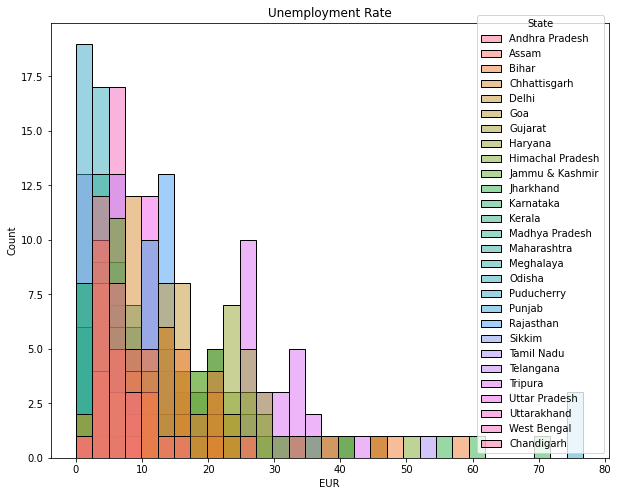

In [103]:
plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="State", data=df, )
plt.show()

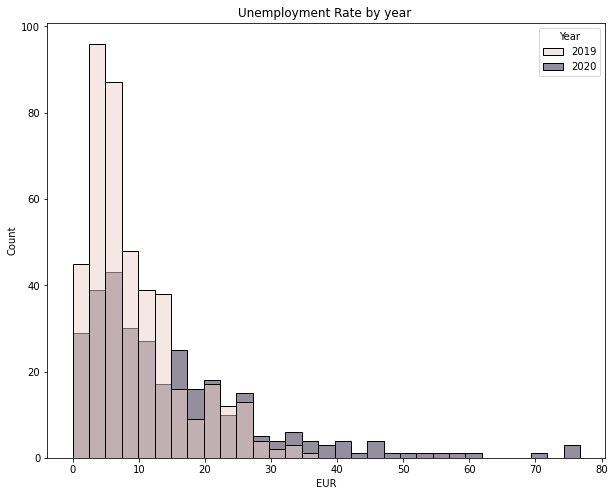

In [109]:
plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate by year ")
sns.histplot(x="EUR", hue="Year", data=df, )
plt.show()

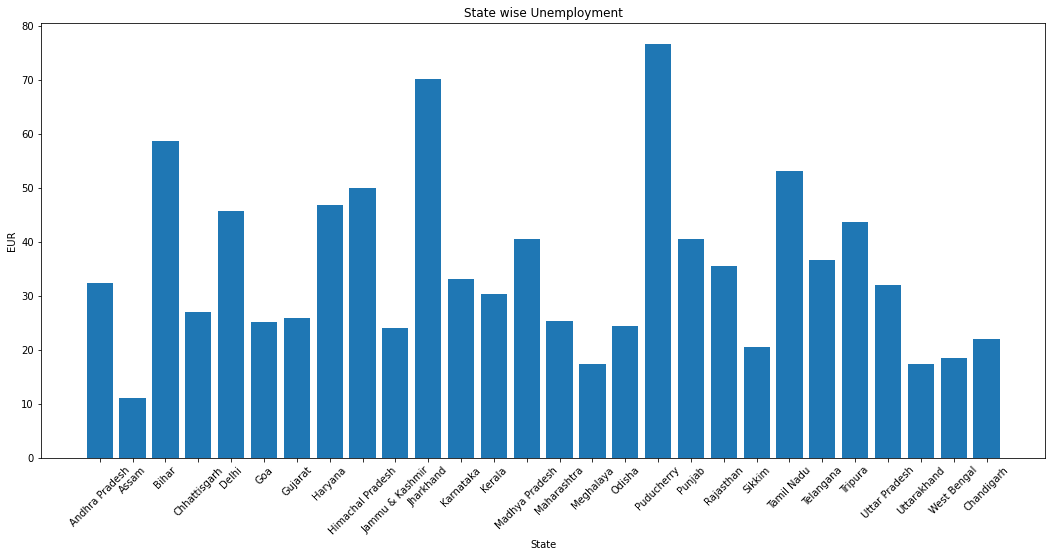

In [118]:
plt.figure(figsize=(18, 8))
plt.bar(df['State'], df['EUR'])
plt.xticks(rotation=45)
# add labels and title
plt.xlabel('State',ha='center')
plt.ylabel('EUR')
plt.title('State wise Unemployment')

# display the graph
plt.show()

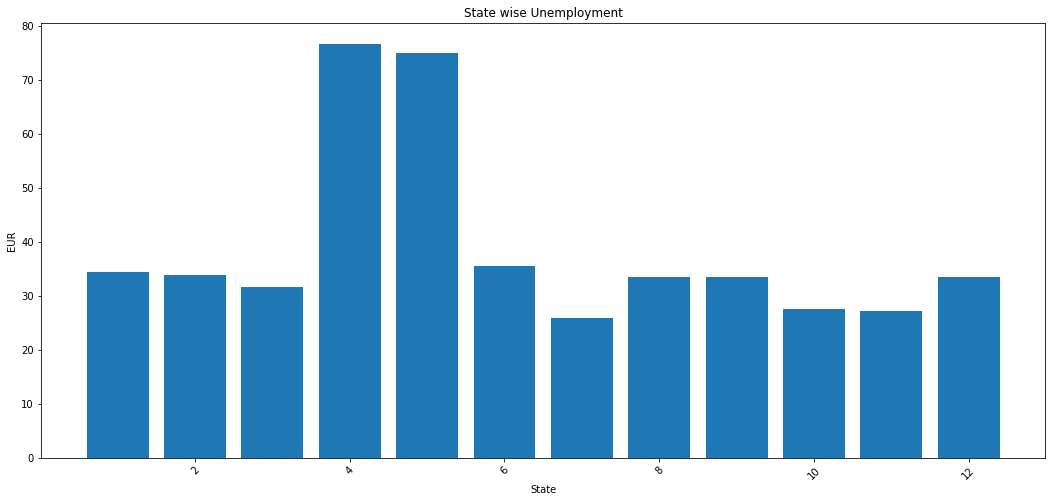

In [119]:
plt.figure(figsize=(18, 8))
plt.bar(df['Month'], df['EUR'])
plt.xticks(rotation=45)
# add labels and title
plt.xlabel('Month'',ha='center')
plt.ylabel('EUR')
plt.title('State wise Unemployment')

# display the graph
plt.show()

As you see Unemployent rate is high in April Month

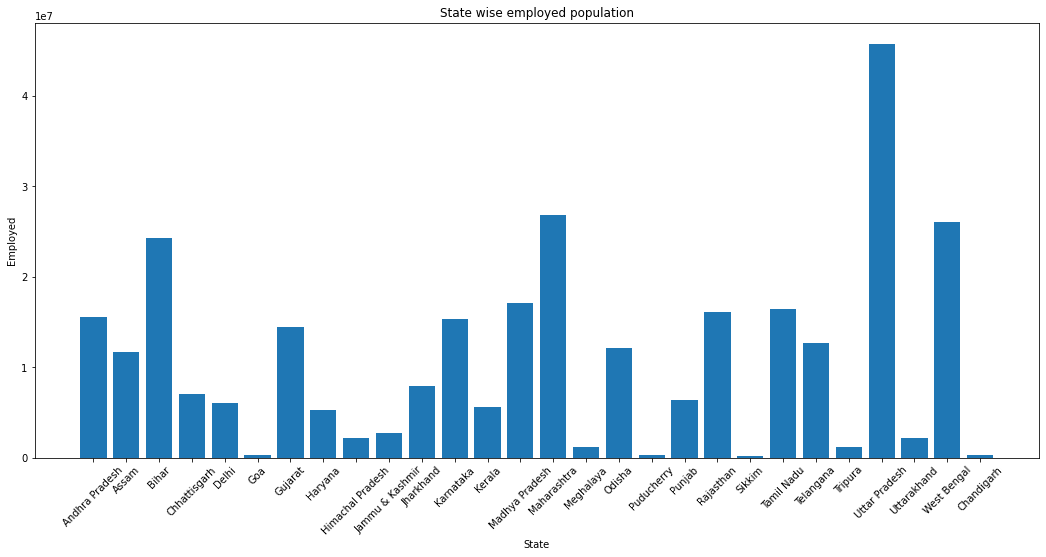

In [123]:
plt.figure(figsize=(18, 8))
plt.bar(df['State'], df['EE'])
plt.xticks(rotation=45)
# add labels and title
plt.xlabel('State',ha='center')
plt.ylabel('Employed')
plt.title('State wise employed population')

# display the graph
plt.show()